In [1]:
def count_and_save_reads_with_base(fastq_path, valid_bases, output_path):
    """
    Counts and saves FASTQ reads that contain at least one base from the given set.
    
    Args:
        fastq_path (str): Path to FASTQ file
        valid_bases (set): Set of acceptable bases (e.g., {'A', 'T', 'C', 'G'})
        output_path (str): Path to save matching reads in FASTQ format

    Returns:
        int: Number of reads that contain at least one valid base
    """
    count = 0
    with open(fastq_path, 'r') as infile, open(output_path, 'w') as outfile:
        while True:
            header = infile.readline()
            if not header:
                break
            seq = infile.readline()
            plus = infile.readline()
            qual = infile.readline()

            if any(base in valid_bases for base in seq.upper()):
                outfile.write(f"{header}{seq}{plus}{qual}")
                count += 1
    return count


In [3]:
# Inputs
fastq_file = r"D:\PHAR0023\Undetermined_S0_L001_R1_001.fastq"
valid_bases_1 = {'A', 'T', 'C', 'G'}
output_path_1 = r"D:\PHAR0023\valid_base_reads.fastq"

# Run the function
hits_1 = count_and_save_reads_with_base(fastq_file, valid_bases_1, output_path_1)

# Print result
print(f"Total reads containing at least one valid base: {hits_1}")
print(f"Matching reads saved to: {output_path_1}")


Total reads containing at least one valid base: 1049450
Matching reads saved to: D:\PHAR0023\valid_base_reads.fastq


In [13]:
import re

def count_and_save_matching_reads_fastq(fastq_path, target_sequence, output_path):
    """
    Counts and saves reads from a FASTQ file that match a target sequence,
    allowing 'N' as a wildcard for any base.
    
    Args:
        fastq_path (str): Path to the input FASTQ file.
        target_sequence (str): Sequence to search for (N = any base).
        output_path (str): Path to save matching reads (FASTQ format).
        
    Returns:
        int: Number of reads that match the pattern
        list: First 10 matching sequences (as strings)
    """
    count = 0

    # Convert 'N' to '.' for regex wildcard matching
    pattern = re.compile(target_sequence.upper().replace("N", "."))

    with open(fastq_path, 'r') as infile, open(output_path, 'w') as outfile:
        while True:
            header = infile.readline()
            if not header:
                break
            seq = infile.readline()
            plus = infile.readline()
            qual = infile.readline()

            if pattern.search(seq.upper()):
                outfile.write(f"{header}{seq}{plus}{qual}")
                count += 1

    return count


In [32]:
target_seq_2 = "TTTTCCACTGGTCTCCT"
output_path_2 = r"D:\PHAR0023\TTTTCCACTGGTCTCCT_matches.fastq"

hits_2 = count_and_save_matching_reads_fastq(fastq_file, target_seq_2, output_path_2)

print(f"Total reads containing '{target_seq_2}': {hits_2}")


Total reads containing 'TTTTCCACTGGTCTCCT': 212605


In [48]:
target_seq_3 = "TTTTCCTCTGGTCTCCT"
output_path_3 = r"D:\PHAR0023\TTTTCCTCTGGTCTCCT_matches.fastq"

hits_3 = count_and_save_matching_reads_fastq(fastq_file, target_seq_3, output_path_3)

print(f"Total reads containing '{target_seq_3}': {hits_3}")


Total reads containing 'TTTTCCTCTGGTCTCCT': 141595


In [21]:
def count_and_save_reads_with_mismatches(fastq_path, target_seq, max_mismatches, output_path):
    """
    Counts and saves FASTQ reads that contain the target sequence with allowed mismatches.
    
    Args:
        fastq_path (str): Path to input FASTQ file
        target_seq (str): Sequence to search for
        max_mismatches (int): Number of mismatches allowed
        output_path (str): Path to save matching FASTQ reads
        
    Returns:
        int: Number of matching reads
    """
    def has_approx_match(read, target, max_mismatches):
        target_len = len(target)
        for i in range(len(read) - target_len + 1):
            window = read[i:i + target_len]
            mismatches = sum(1 for a, b in zip(window, target) if a != b)
            if mismatches <= max_mismatches:
                return True
        return False

    count = 0
    target_seq = target_seq.upper()

    with open(fastq_path, 'r') as infile, open(output_path, 'w') as outfile:
        while True:
            header = infile.readline()
            if not header:
                break
            seq = infile.readline()
            plus = infile.readline()
            qual = infile.readline()

            if has_approx_match(seq.strip().upper(), target_seq, max_mismatches):
                outfile.write(f"{header}{seq}{plus}{qual}")
                count += 1

    return count


In [40]:
# Target parameters
target_seq_4 = "TTTTTTTTTTTTTTTTTTTTTTTTTTTTTT"  
allowed_mismatches = 6
output_path_4 = r"D:\PHAR0023\polyT_matches.fastq"

# Count and save reads with mismatches
hits_4 = count_and_save_reads_with_mismatches(fastq_file, target_seq_4, allowed_mismatches, output_path_3)

# Print result
print(f"Total reads containing '{target_seq_4}' with ≤{allowed_mismatches} mismatches: {hits_4}")
print(f"Matching reads saved to: {output_path_4}")

Total reads containing 'TTTTTTTTTTTTTTTTTTTTTTTTTTTTTT' with ≤6 mismatches: 645069
Matching reads saved to: D:\PHAR0023\polyT_matches.fastq


C:\Users\yegor\figures.zip

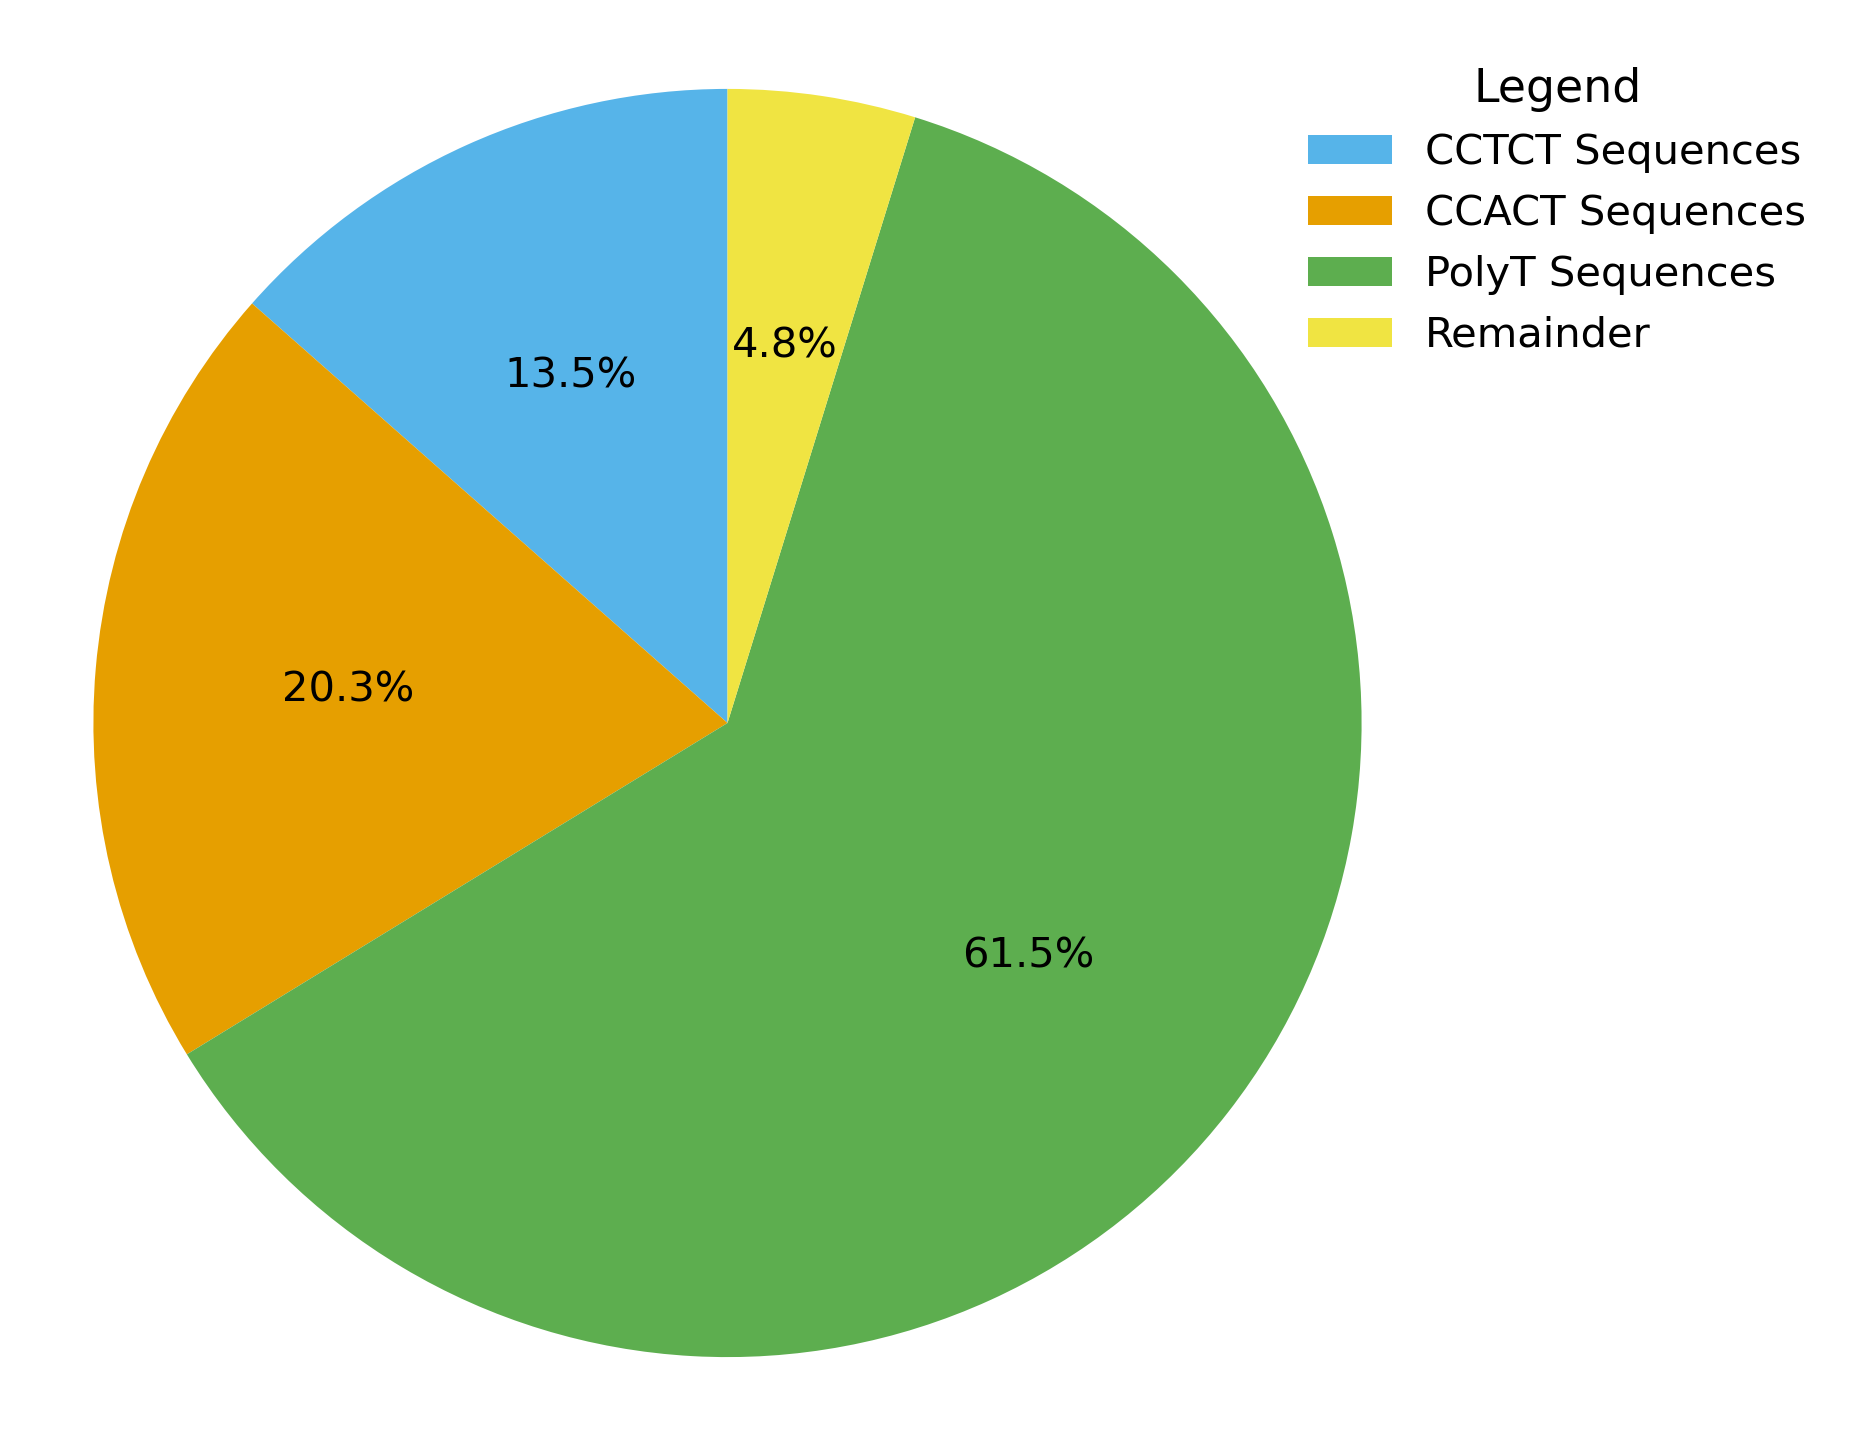

In [52]:
import matplotlib.pyplot as plt


Total = hits_1
Remainder = Total - hits_2 - hits_3 - hits_4

# Labels and data
labels = ['CCTCT Sequences', 'CCACT Sequences', 'PolyT Sequences', 'Remainder']
sizes = [hits_3, hits_2, hits_4, Remainder]
colors = ['#56B4E9', '#E69F00', '#5DAE4F', '#F0E442']

fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
wedges, _, _ = ax.pie(sizes, autopct='%1.1f%%', colors=colors, startangle=90)
ax.axis('equal')

ax.legend(wedges, labels,
          title="Legend",
          loc='upper right',
          bbox_to_anchor=(1.3, 1),
          frameon=False,
          fontsize=10,
          title_fontsize=11)


from IPython.display import FileLink

import zipfile

with zipfile.ZipFile("figures.zip", "w") as zipf:
    zipf.write("my_figure.png")
    # add more files if needed

from IPython.display import FileLink
FileLink("figures.zip")

In [54]:
def extract_unmatched_reads(original_fastq, matched_fastq_files, output_path):
    """
    Extracts and saves reads from the original FASTQ file that are not found
    in any of the matched FASTQ files (based on sequence).
    
    Args:
        original_fastq (str): Path to the original FASTQ file
        matched_fastq_files (list): List of FASTQ files with matched reads
        output_path (str): Path to save unmatched reads (FASTQ format)
    """
    # Step 1: Collect sequences from all matched files
    matched_seqs = set()
    for file in matched_fastq_files:
        with open(file, 'r') as f:
            while True:
                header = f.readline()
                if not header:
                    break
                seq = f.readline().strip()
                f.readline()  # +
                f.readline()  # quality
                matched_seqs.add(seq.upper())  # Normalize case

    # Step 2: Scan original FASTQ and write unmatched reads
    with open(original_fastq, 'r') as infile, open(output_path, 'w') as outfile:
        while True:
            header = infile.readline()
            if not header:
                break
            seq = infile.readline()
            plus = infile.readline()
            qual = infile.readline()

            if seq.strip().upper() not in matched_seqs:
                outfile.write(f"{header}{seq}{plus}{qual}")


In [56]:
original_fastq = r"D:\PHAR0023\Undetermined_S0_L001_R1_001.fastq"
matched_fastqs = [
    r"D:\PHAR0023\CCTCTGGTCTCCT_matches.fastq",
    r"D:\PHAR0023\CCACTGGTCTCCT_matches.fastq",
    r"D:\PHAR0023\polyT_matches.fastq"
]
output_unmatched = r"D:\PHAR0023\unmatched_reads.fastq"

extract_unmatched_reads(original_fastq, matched_fastqs, output_unmatched)



In [66]:
import re

def count_and_save_and_print_matching_reads_fastq(fastq_path, target_sequence, output_path):
    """
    Counts and saves reads from a FASTQ file that match a target sequence,
    allowing 'N' as a wildcard for any base.
    
    Returns:
        int: number of matching reads
        list: first 10 matching sequences
    """
    count = 0
    first_22 = []

    pattern = re.compile(target_sequence.upper().replace("N", "."))

    with open(fastq_path, 'r') as infile, open(output_path, 'w') as outfile:
        while True:
            header = infile.readline()
            if not header:
                break
            seq = infile.readline()
            plus = infile.readline()
            qual = infile.readline()

            if pattern.search(seq.upper()):
                outfile.write(f"{header}{seq}{plus}{qual}")
                count += 1
                if len(first_22) < 22:
                    first_22.append(seq.strip())

    return count, first_22


In [70]:
target_seq_5 = "TTTTTTTTTTTTTTTTTTCCACTCCNNNNNNNNACCCGCTGGTCTCCT"
output_path_5 = r"D:\PHAR0023\NNNNNNNNNNN_matches.fastq"

hits_5, first_22_seqs = count_and_save_and_print_matching_reads_fastq(fastq_file, target_seq_5, output_path_5)

print(f"Total reads containing '{target_seq_5}': {hits_5}")
print("\nFirst 10 matching sequences:")
for i, seq in enumerate(first_22_seqs, 1):
    print(f"{i:02d}: {seq}")


Total reads containing 'TTTTTTTTTTTTTTTTTTCCACTCCNNNNNNNNACCCGCTGGTCTCCT': 22

First 10 matching sequences:
01: TTTTTTTTTTTTTTTTTTTTCCACTCCAAGCGCCTACCCGCTGGTCTCCTAGACTCTTCGGAGAGATCGGAAGAGCACACGTCTGAACTCCTGTCACATTTCGATCCCGTATTCCCTTTTTTCTTTTTAAAAAAGGGGGGGGGGGGGGGGG
02: TTTTTTTTTTTTTTTTTTTTCCACTCCAAGCGCCTACCCGCTGGTCTCCTAGACTCTTCGGAGAGATCGGAAGAGCACACGTCTGAACTCCAGTCACATTACGATCCCGTTTCCCCTTTTTTCCTTTAAAAAAAGGGGGGGGGGGGGGGGG
03: TTTTTTTTTTTTTTTTTTTTCCACTCCAGCGAGAGACCCGCTGGTCTCCTAGACTCTTCGGAGAGATCGGAAGAGCACACGTCTGAACTCTTGTCACATTACGATCTTGTTTTTTCTTTTTTTTTTTTTTTATAAACCTGAGAGCCGGGGG
04: TTTTTTTTTTTTTTTTTTTTCCACTCCCACTCGCGACCCGCTGGTCTCCTAGACTCTTCGGAGAGATCGGAAGAGCACACGTCTGAACTCCTATCTCATTTTGATCTCGTTTTCCCTTTTTTTCTTTTTTTTATAAAGGGGGGGGGGGGGG
05: TTTTTTTTTTTTTTTTTTTCCACTCCAGTAAACAACCCGCTGGTCTCCTAGACTCTTCGGAGAGATCGGAAGAGCACACGTCTGAACTCCAGTCTCATCACGATCTCGTTTACCCACTTTTTGCTGGACTGAGGGGTGGGCGGCGGGCGAT
06: CTTTTTTTTTTTTTTTTTTTCCACTCCTGGTAACCACCCGCTGGTCTCCTAGACTCTTCGGAGAGATCGGAAGAGCACACGTCTGAACTCCAGTCACATCACGATCCC